# Topics:

- [ ] What is Unsupervised learning
- [ ] what is clustering in machine learning ?
- [ ] What is K-means
- [ ] How does K-means work?
- [ ] How to improve KMeans
- [ ] Clustering Comparison Metrics

## Unsupervised Learning


<img src = "https://cdn-images-1.medium.com/max/960/1*31iqrQyCqIuuGPLUK_BjMQ.png" width=75%>

<img src = "https://miro.medium.com/max/2560/0*p3zNp9D8YFmX32am.jpg" width=75%>

## what is clustering in machine learning ?

Unsupervised learning is a machine learning technique that groups data points together without the use of labeled data. Clustering is a type of unsupervised learning that uses algorithms to group data into clusters **based on similarities**.

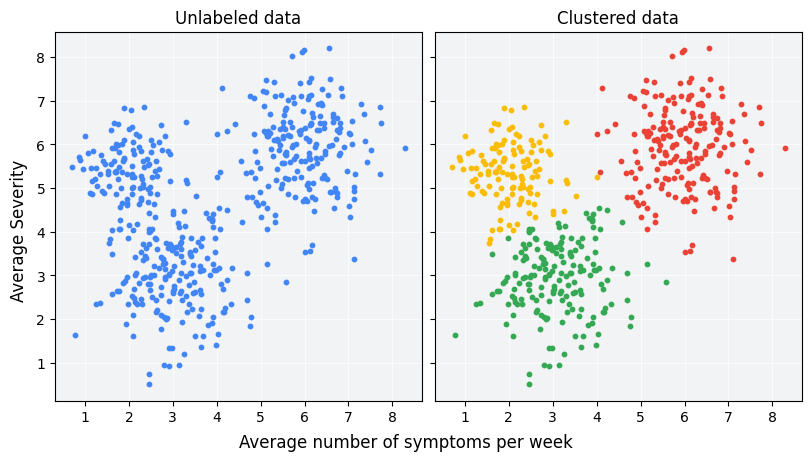

Clustering is the process of arranging a group of objects in such a manner that the objects in the same group (which is referred to as a cluster) are more similar to each other than to the objects in any other group.  Data professionals often use clustering in the Exploratory Data Analysis phase to discover new information and patterns in the data. As clustering is unsupervised machine learning, it doesn’t require a labeled dataset.

Clustering itself is not one specific algorithm but the general task to be solved. You can achieve this goal using various algorithms that differ significantly in their understanding of what constitutes a cluster and how to find them efficiently.

## What is K-means ?

K-means clustering is a simple and popular type of unsupervised machine learning algorithm, which is used on unlabeled data. The goal of this algorithm is toﬁnd groups in the data, with the number of groups represented by the variable K. The algorithm works **iteratively** to assign each data point to one of K groups according to provided features similarity.The K-means algorithm aims to **choose centroids that minimise the inertia**, or within-cluster sum of squared(**wcss**) criterion:

$$
\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2)
$$

## How the algorithm works

The Κ-means clustering algorithm uses iterative refinement to produce a final result. The algorithm inputs are the number of clusters $k$ and the data set. The data set is a collection of features for each data point. The algorithms starts with initial estimates for the $k$ centroids, which can either be randomly generated or randomly selected from the data set. The algorithm then iterates between two steps:

**Data assigment step:**
Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, based on the **squared Euclidean distance**. More formally, if $c_i$ is the collection of centroids in set $C$, then each data point $x$ is assigned to a cluster based on:

\
$$
\arg \min_{c_i \in C}\:dist{(c_i,x)}^2
$$



**Centroid update step:** In this step, the centroids are recomputed. This is done by **taking the mean of all data points assigned to that centroid's cluster**.

$$
c_i=\frac{1}{|S_i|}\sum_{x \in S_i}x
$$
\
The algorithm **iterates between steps one and two until a stopping criteria is met** (i.e., no data points change clusters, the sum of the distances is minimized, or some maximum number of iterations is reached).

\
**Convergence and random initialization:**
K-Means always converges after a finite number of iterations, since its objective function (the sum of squared distances between points and their assigned centroids) decreases at each step and the number of possible partitions is finite.

However, this convergence is not necessarily to the global optimum, but often to a local optimum.

The reason is that the algorithm starts with **randomly chosen centroids, and poor initialization** can lead to suboptimal clustering.


**How to mitigate this issue**:

In standard implementations (e.g., scikit-learn), the algorithm is typically run multiple times with different random initializations (**n_init**), and the best result is kept.

A smarter initialization method called **k-means++** selects initial centroids in a more strategic way, which reduces the chance of getting stuck in a poor local optimum.

https://shabal.in/visuals/kmeans/2.html

## How to improve KMeans

There are several numbers of methods for figuring out number of clusters that work differently. The weakness of k-means clustering is that we don’t know how many clusters we need by just running the model. We need to test ranges of values and make a decision on the best value of k.
In this section, we will discuss `Elbow Method` and `Silhouette Coefficient` and compare them.
We typically make a decision using these methods to determine the optimal number of clusters where we are both not overfitting the data with too many clusters, and also not underfitting with too few.

inertia = the sum of squared distances of samples to their closest cluster center.
A lower inertia means that the data points are closer to their cluster centers → the clusters are more compact, which often indicates "better" clustering.

However, a smaller inertia does not always mean optimal clustering, because if you increase the number of clusters (e.g., one cluster per point), inertia will approach zero.

That’s why inertia is typically used together with methods like the Elbow Method to find a reasonable number of clusters.

### **Elbow Method**

The **Elbow Method** is one of the most commonly used techniques to determine the optimal number of clusters (K) in K-means clustering. It is based on **inertia**, which measures the sum of squared distances between each data point and its nearest centroid.

- **Inertia** decreases as the number of clusters increases. This is because, with more clusters, each point is likely to be closer to its assigned centroid.
- The goal is to find the "elbow" in the plot of inertia vs. K. The **elbow point** represents the point where adding more clusters does not result in a significant decrease in inertia. This indicates that further increasing K is not improving the model substantially.
- The point where the **inertia curve starts flattening** is considered the optimal number of clusters.

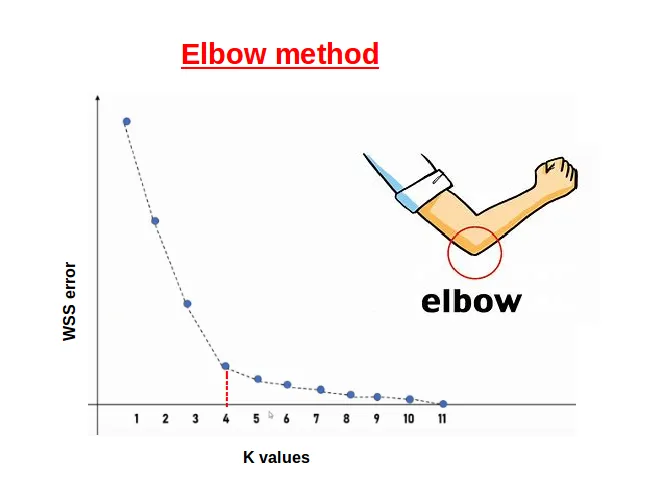

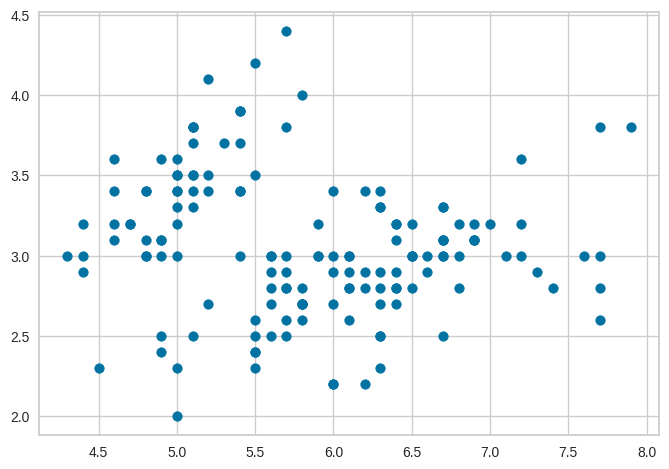

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

iris = datasets.load_iris()
X = iris.data
y = iris.target

plt.scatter(X[:, 0], X[:, 1])
plt.show()

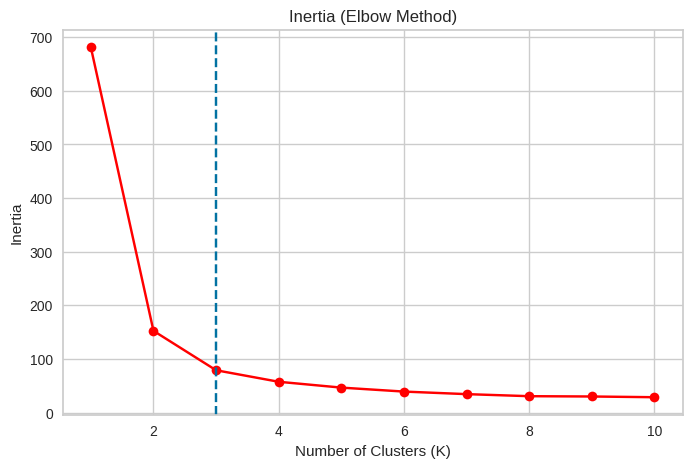

In [ ]:
# Inertia (Elbow Method)
def compute_inertia(X, max_k=10):
    inertia_vals = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia_vals.append(kmeans.inertia_)
    return inertia_vals

inertia_vals = compute_inertia(X, max_k=10)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_vals, marker='o', color="red")
plt.axvline(x=3, ls='--')
plt.title('Inertia (Elbow Method)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

### **Silhouette Score**

The **Silhouette Score** measures how well each data point fits within its assigned cluster compared to how well it fits in other clusters. The silhouette score for a data point is calculated as:

$$
S = \frac{(b - a)}{\max(a, b)}
$$

Where:
- **a** is the mean intra-cluster distance (the average distance between a point and other points within the same cluster).
- **b** is the mean nearest-cluster distance (the average distance between a point and the points in the nearest cluster).

- **Silhouette Score Range**: The score ranges from **-1** to **1**.
  - A value close to **1** indicates that the point is well clustered.
  - A value close to **0** means that the point is on or very close to the decision boundary between clusters.
  - A negative value indicates that the point might have been assigned to the wrong cluster.

The optimal K is the one that maximizes the silhouette score, indicating that the clusters are well-separated and compact.


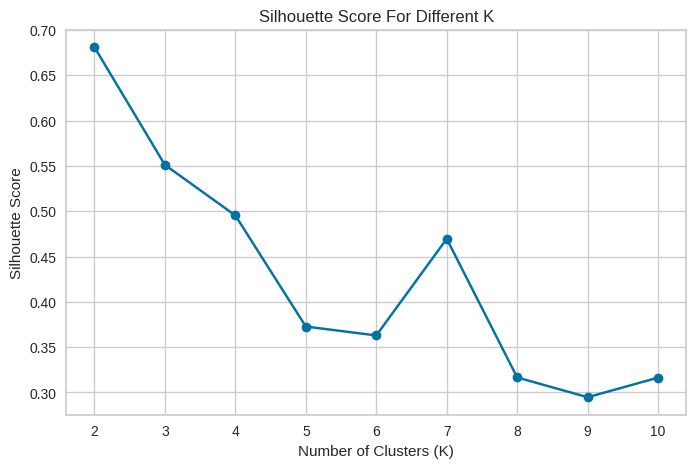

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
max_k = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, max_k+1):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil, marker='o')
plt.title('Silhouette Score For Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

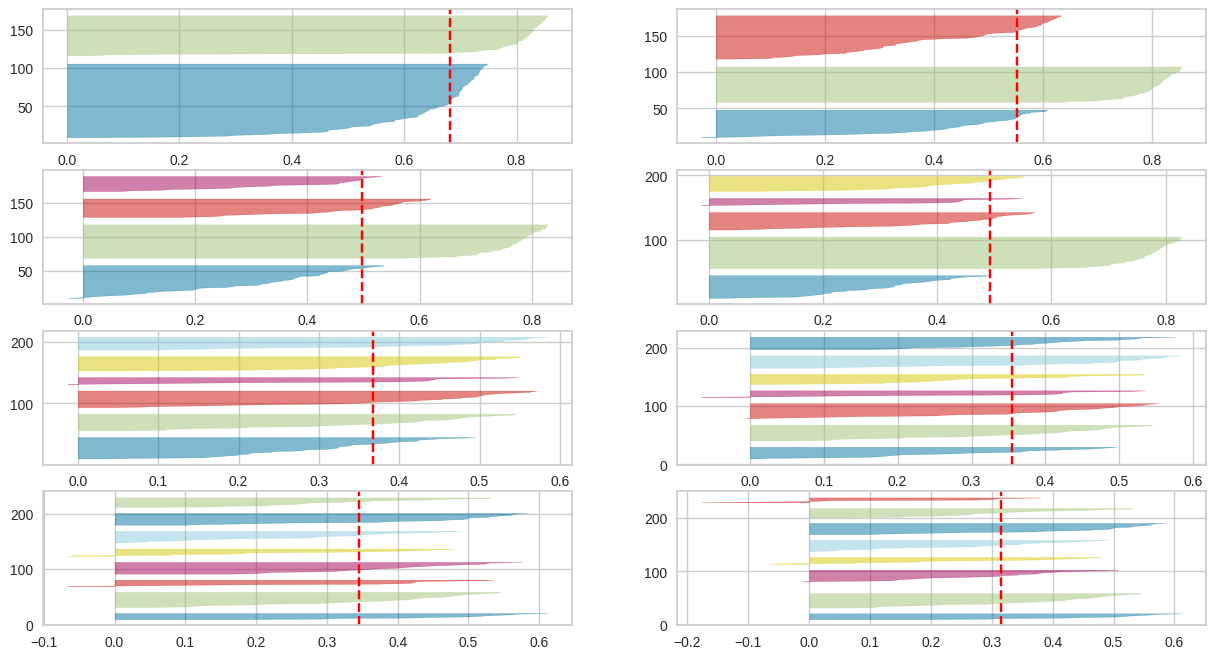

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(15,8))
for k in range(2, 10):
    #Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=k, random_state=42)
    q, mod = divmod(k, 2)

    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

A **Silhouette Plot** is a graphical representation of the silhouette coefficient for each data point. It shows:
- **Silhouette width for each point**: A wider silhouette indicates better clustering for that point.
- **Separation between clusters**: The plot shows how distinct the clusters are from one another. Large gaps between clusters suggest better-defined clusters.

In a **Silhouette Plot**:
- Each cluster is represented by a horizontal bar of silhouette scores for the points in that cluster.
- The points are ordered by silhouette score within each cluster.
- A red dashed line shows the **average silhouette score** for all points.

**Interpreting Silhouette Analysis**

1. **Positive Silhouette Coefficients**: A positive silhouette score indicates that the data point is well within the boundary of its cluster.
2. **Negative Silhouette Coefficients**: A negative silhouette score means the point is likely in the wrong cluster.
3. **Cluster Separation**: The gaps between the clusters in the silhouette plot indicate how distinct the clusters are. Large gaps suggest better-defined clusters, while overlapping bars suggest poorly separated clusters.
4. **Choosing the Optimal Number of Clusters**: Silhouette analysis can help choose the optimal number of clusters by comparing the **average silhouette score** for different numbers of clusters (K). The best K is typically the one with the highest silhouette score.

**When to Use Silhouette Analysis**

- **Cluster Quality Evaluation**: It is used to assess the quality of clustering and determine whether the clusters are well-separated and cohesive.
- **Determining Optimal Number of Clusters**: By plotting the silhouette score for different values of K (e.g., in K-means), you can identify the number of clusters that maximizes the average silhouette score.

**Example of Silhouette Analysis in K-means**

Let’s assume you have clustered data using K-means with different numbers of clusters. After applying Silhouette Analysis, you might see:

- **High silhouette score** (close to +1): Clusters are well-defined, with little overlap.
- **Low silhouette score** (close to 0): Clusters are not well-separated; some data points are likely to be near the cluster boundaries.
- **Negative silhouette score**: Some data points are potentially assigned to the wrong clusters.

In practice, **Silhouette Analysis** is a valuable tool for understanding the clustering structure of the data and for determining the optimal number of clusters.

### Davies-Bouldin Index (DB Index)

The **Davies-Bouldin Index (DB Index)** is another internal evaluation metric for clustering algorithms. It measures the average similarity between each cluster and the cluster that is most similar to it. The similarity is defined as a ratio of the within-cluster distances to the between-cluster distances.

- **Formula**:
  
$$
DB = \frac{1}{N} \sum_{i=1}^{N} \max_{j \neq i} \left( \frac{s_i + s_j}{d_{ij}} \right)
$$

Where:
- **N** is the number of clusters.
- **$s_i$** is the average distance between each point in the i-th cluster and the centroid of that cluster (intra-cluster distance).
- **$d_{ij}$** is the distance between the centroids of the i-th and j-th clusters (inter-cluster distance).

- **Davies-Bouldin Score Range**: The index is always positive, and **lower values** are better.
  - A lower DB index indicates that the clusters are well-separated and compact.
  
Unlike inertia, the Davies-Bouldin index does not rely on a visual method, and it tends to give a more objective evaluation of cluster quality.


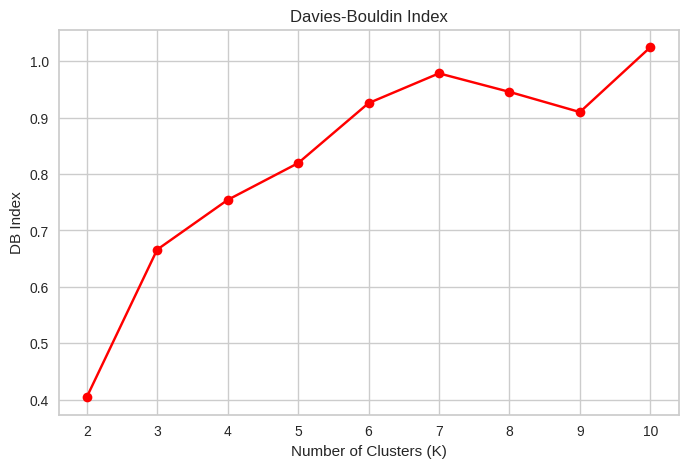

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin Index
def compute_db_index(X, max_k=10):
    db_vals = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        db_vals.append(davies_bouldin_score(X, labels))
    return db_vals

db_vals = compute_db_index(X, max_k=10)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), db_vals, marker='o', color='red')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('DB Index')
plt.show()

### Summary of Methods

| Method                      | Objective                                         | Interpretation for Optimal K   |
|------------------------------|--------------------------------------------------|--------------------------------|
| **Inertia (Elbow Method)**    | Minimize the sum of squared distances (inertia). | "Elbow" point where the curve flattens. |
| **Silhouette Score**          | Maximize the mean silhouette score.              | Maximize the score close to 1. |
| **Davies-Bouldin Index**      | Minimize the Davies-Bouldin index.               | Minimize the DB index.         |

Each method offers a different perspective on determining the optimal number of clusters, and it is often useful to use a combination of methods to get a more comprehensive understanding of the cluster structure in the data.

## Clustering Comparison Metrics

* Homogeneity - measures whether or not all of its clusters contain only data points which are members of a single class.
* Completeness - measures whether or not all members of a given class are elements of the same cluster
* V-measure - the harmonic mean between homogeneity and completeness

| Data Type                         | Suitable Metrics                                      | Description                                                                                              |
| --------------------------------- | ----------------------------------------------------- | -------------------------------------------------------------------------------------------------------- |
| **Labeled data (Supervised)**     | **Homogeneity, Completeness, V-measure**              | Measures whether clusters are “pure” and whether all members of a class are grouped in the same cluster. |
| **Unlabeled data (Unsupervised)** | **Silhouette Score, Davies-Bouldin Index (DB Index)** | Internal evaluation of clusters: how compact and well-separated they are, without needing true labels.   |


If the data has true labels → use Homogeneity / Completeness / V-measure.

If the data has no labels → use Silhouette Score or DB Index.

For comparing multiple algorithms or different K values → always choose the appropriate metric to get an objective evaluation.

Algorithms like K-Means, DBSCAN  are unsupervised.
This means that when we run them, we don’t need the true labels. The algorithm finds clusters based on the features of the data by itself.

However, after clustering, if the true labels are available, we can evaluate the clustering:

Here, we use metrics like Homogeneity, Completeness, and V-measure.

These metrics only measure the quality of clustering relative to the true classes.

If we don’t have true labels, we cannot use these metrics, and we have to rely on internal metrics like Silhouette Score or Davies-Bouldin Index, which do not require labels.

**You might ask, well, if we have labels from the beginning, Why do we use unsupervised algorithms like K-Means even when we have labels?**


1. To discover the structure of the data
Even if labels are available, sometimes we want to see if the algorithm can find clusters on its own and whether these clusters align with the actual classes.
This helps us better understand the natural structure of the data.

2. Evaluating the algorithm and label accuracy
Labels may be incorrect or incomplete.
Unsupervised clustering can reveal inconsistencies or problems in the labels.

3. Preparing for unlabeled data
Testing an unsupervised algorithm on labeled data allows us to calculate metrics like Homogeneity and V-measure to evaluate and fine-tune the algorithm.
Later, we can apply the same algorithm to completely unlabeled data with greater confidence.

4. Reducing complexity or quick grouping
Sometimes the goal isn’t precise classification but rather grouping and compressing the data.
Clustering can prepare the data for downstream models, statistical analysis, or visualization.

💡 **Summary**: Even when labels exist, we use unsupervised algorithms to explore data structure, validate the algorithm, or prepare for unlabeled data.